## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# 2.2 Dataset Information

- **gender**: Sex of students -> (Male/Female)
- **race/ethnicity**: Ethnicity of students -> (Group A, B, C, D, E)
- **parental level of education**: Parents' final education -> (Bachelor's Degree, Some College, Master's Degree, Associate's Degree, High School)
- **lunch**: Having lunch before test -> (Standard or Free/Reduced)
- **test preparation course**: Complete or not complete before test
- **math score**
- **reading score**
- **writing score**

# 3. Data Checks to Perform

- Check Missing values
- Check Duplicates
- Check Data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical columns

## 3.1 Check Missing values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates values in the data set


# 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

From the above description of numerical data:
- All means are very close to each other — between **66** and **68.05**.
- All standard deviations are also close — between **14.6** and **15.19**.
- While there is a minimum score of **0** for math, for writing, the minimum is much higher (**10**), and for reading, it is even higher (**17**).

### 3.7 Exploring Data


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [18]:

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [19]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [22]:

reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights

From the above values, we get:
- Students have performed the worst in **Maths**.
- Best performance is in the **Reading** section.

## 4. Exploring Data (Visualization)

### 4.1 Visualize Average Score Distribution to Make Some Conclusion

- **Histogram**
- **Kernel Distribution Function (KDE)**

### 4.1.1 Histogram & KDE

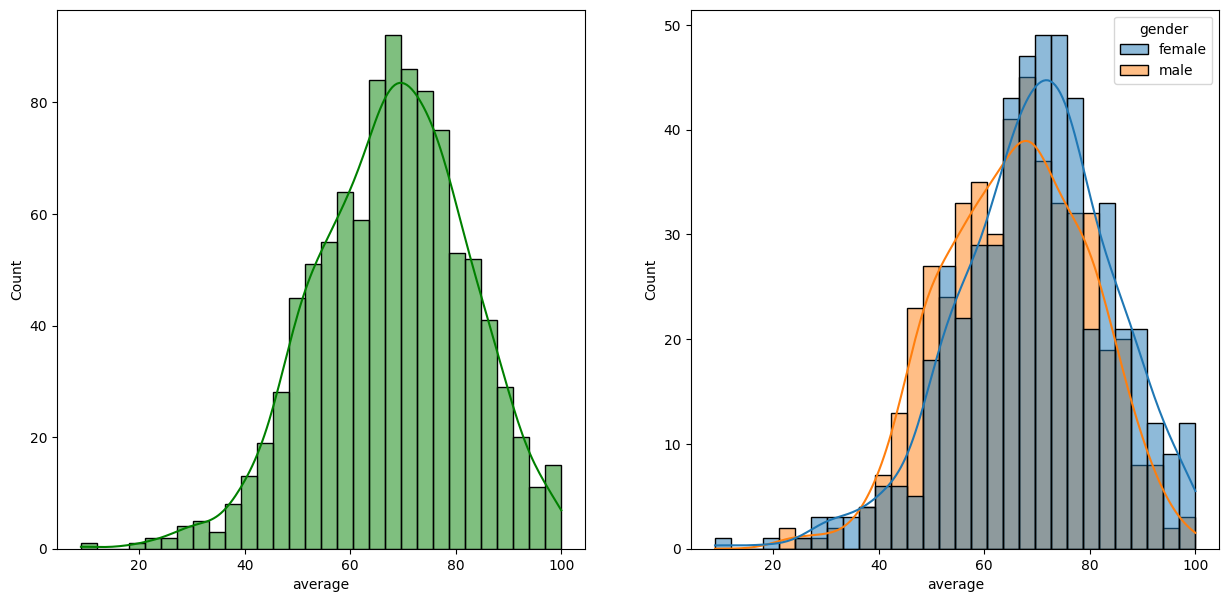

In [24]:
fig , axs = plt.subplots(1 ,2 ,figsize= (15,7))
plt.subplot(121)
sns.histplot(data=df , x='average' , bins=30 , kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df , x='average' ,hue='gender' , bins=30 , kde=True)
plt.show()

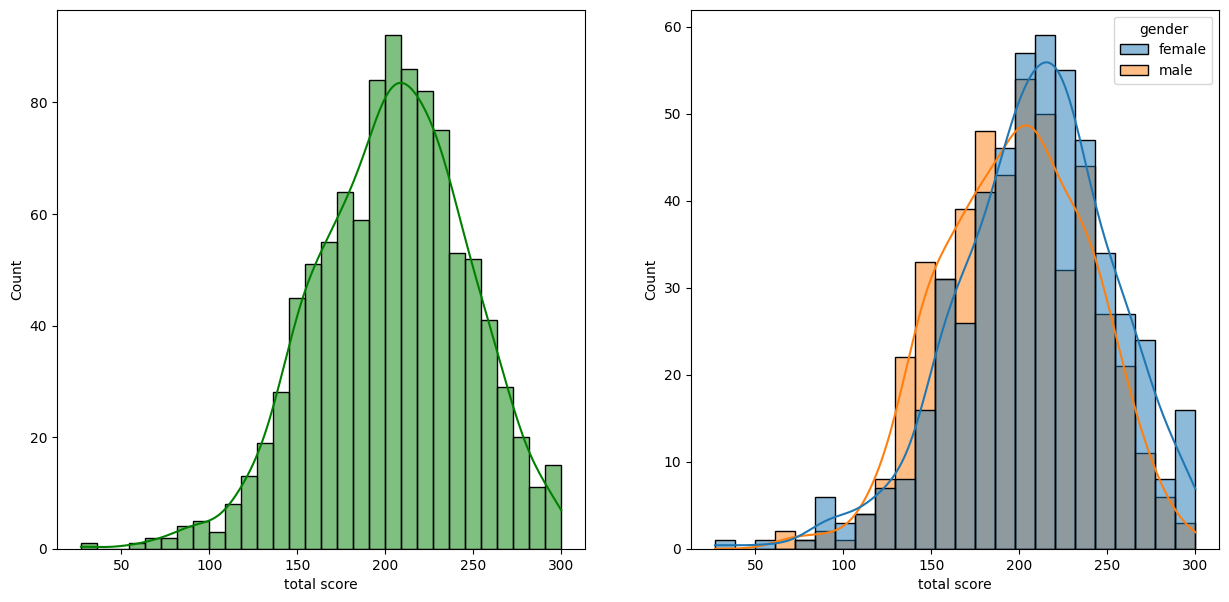

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

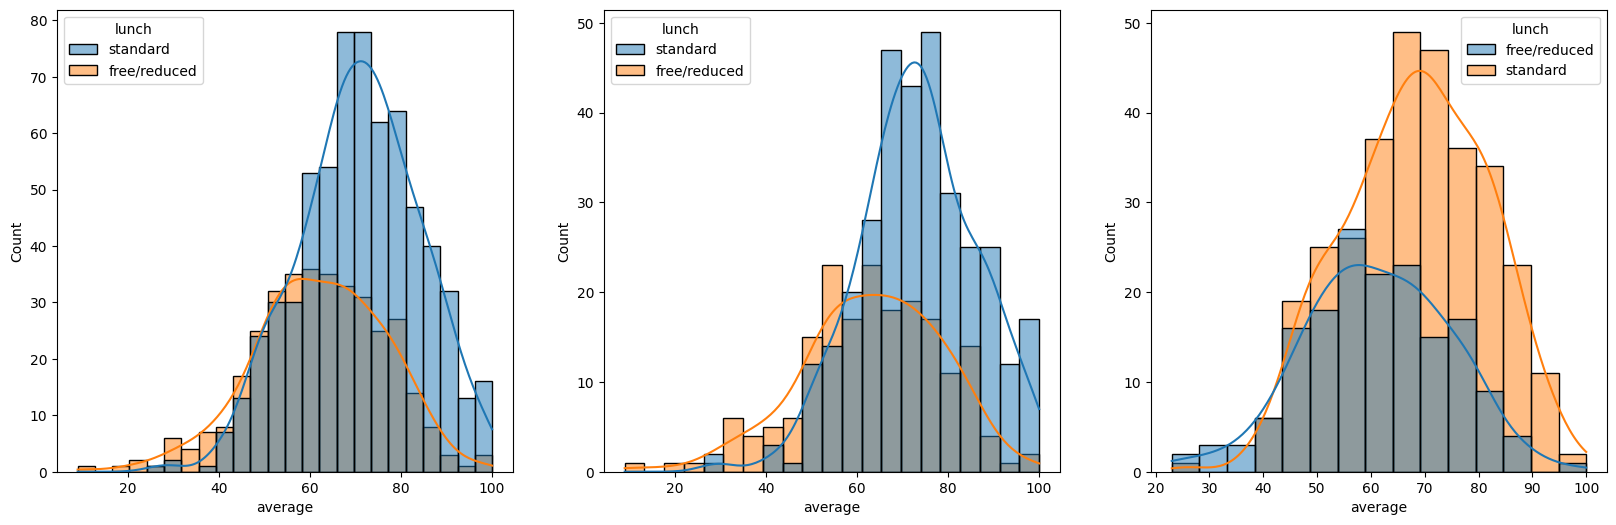

In [35]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams, be it a male or a female.

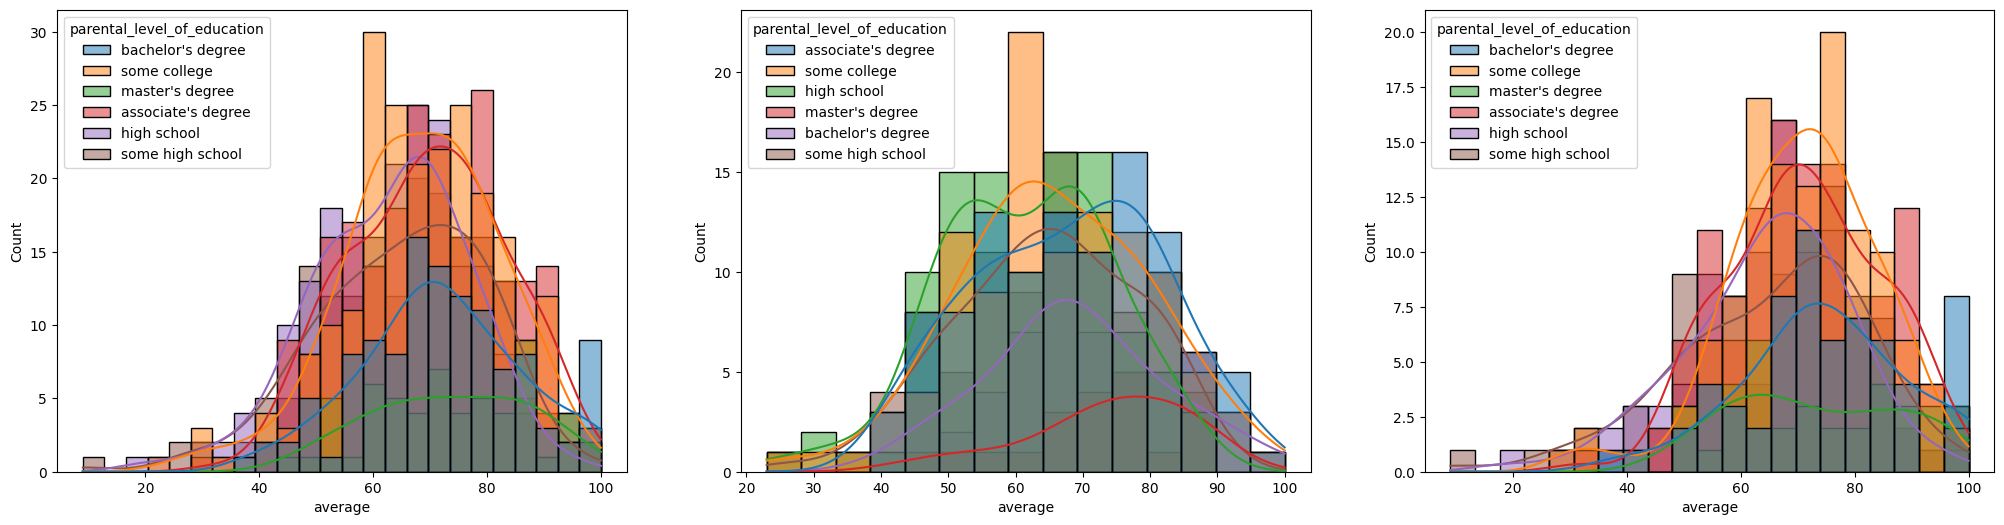

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights

1. In general, parent's education doesn't help students perform well in exams.
2. The 2nd plot shows that parents whose education is of **associate's degree** or **master's degree**, their **male child** tends to perform well in exams.
3. The 3rd plot shows that there is **no effect** of parent's education on **female students**.

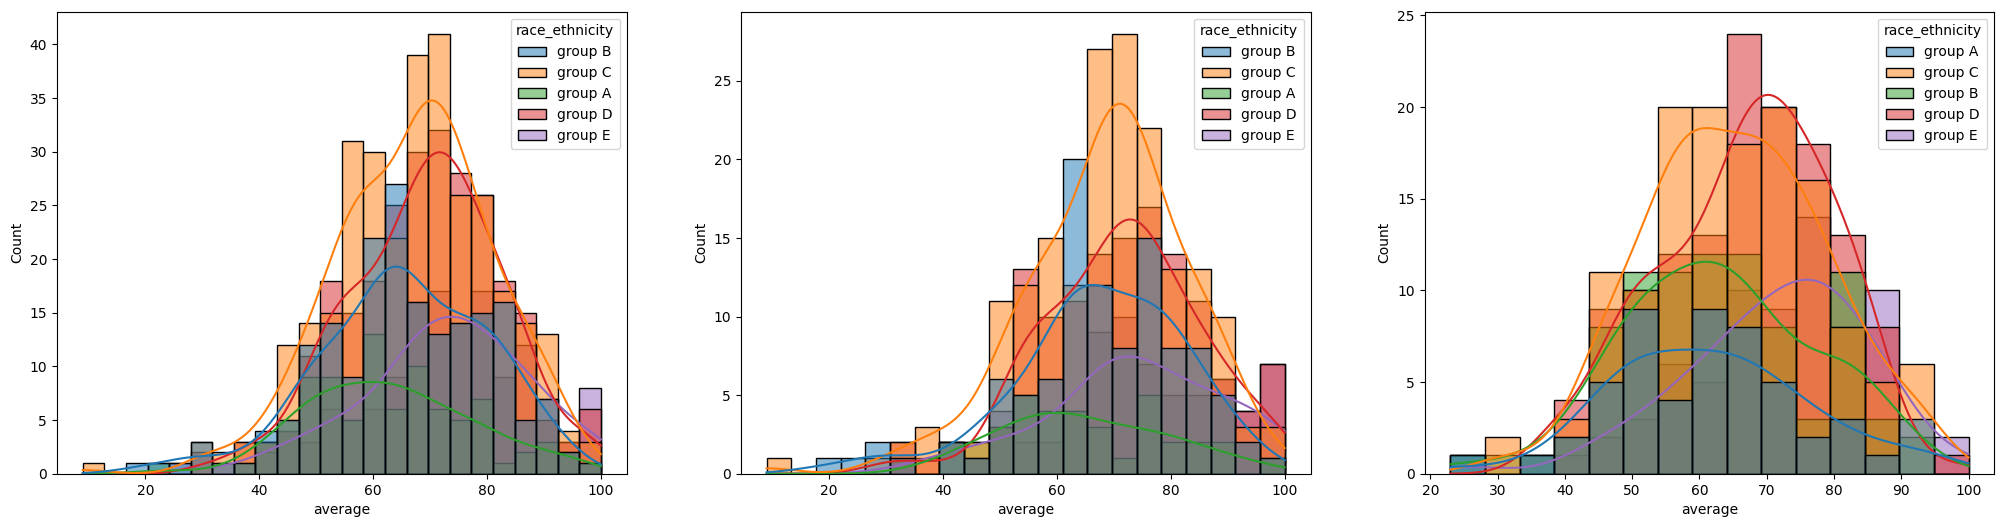

In [42]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights

- Students of **Group A** and **Group B** tend to perform poorly in exams.
- Students of **Group A** and **Group B** tend to perform poorly in exams, irrespective of whether they are male or female.

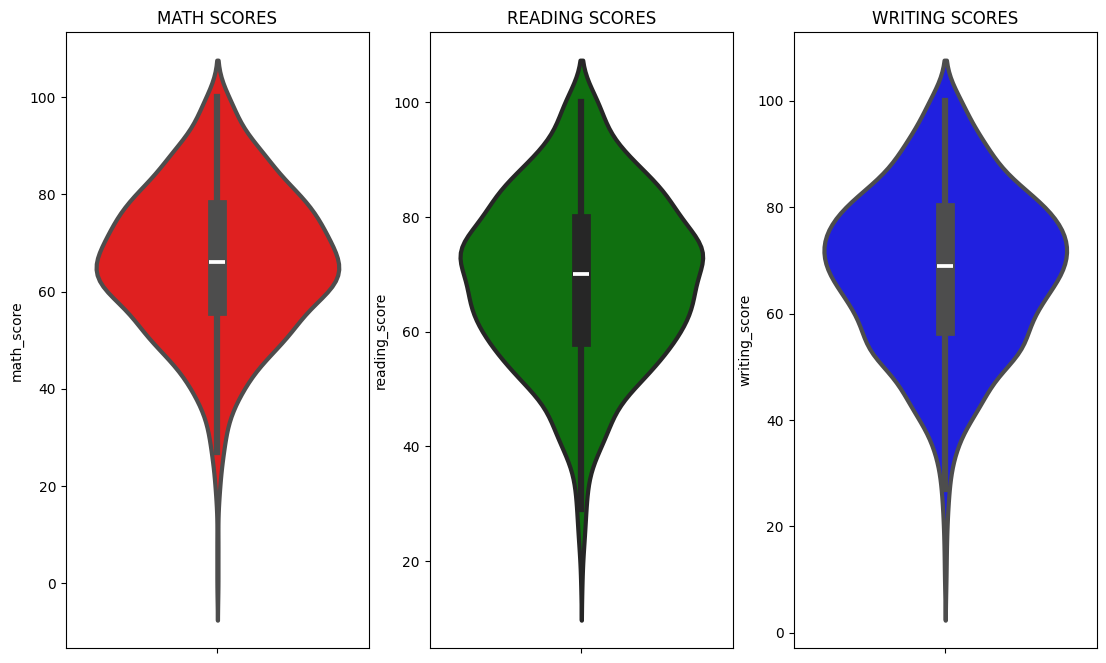

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights

From the above three plots, it's clearly visible that:
- Most of the students score **between 60-80** in **Maths**.
- In **Reading** and **Writing**, most of them score **between 50-80**.

### 4.3 Multivariate Analysis Using Pie Plot

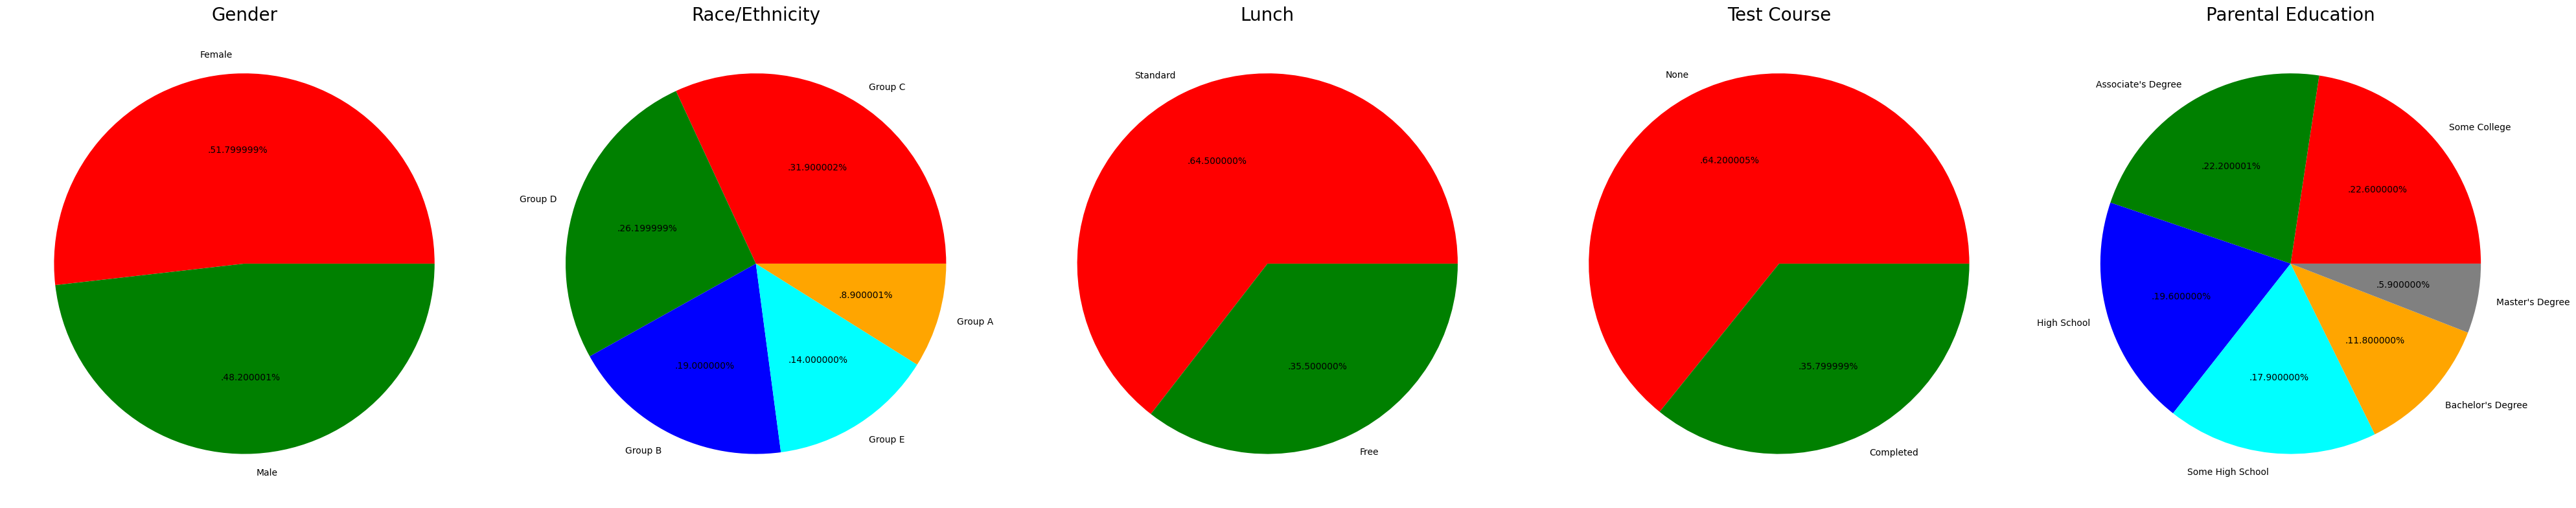

In [53]:
plt.rcParams['figure.figsize'] = (40, 20)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights

- Number of **Male** and **Female** students is almost equal.
- Number of students is greatest in **Group C**.
- Number of students who have **standard lunch** is greater.
- Number of students who have **not enrolled** in any test preparation course is greater.
- Number of students whose parental education is **"Some College"** is greater, followed closely by **"Associate's Degree"**.

## 4.4 Feature Wise Visualization

### 4.4.1 Gender Column

1. **How is the distribution of Gender?**
2. **Does gender have any impact on student's performance?**

#### Univariate Analysis (How is the distribution of Gender?)

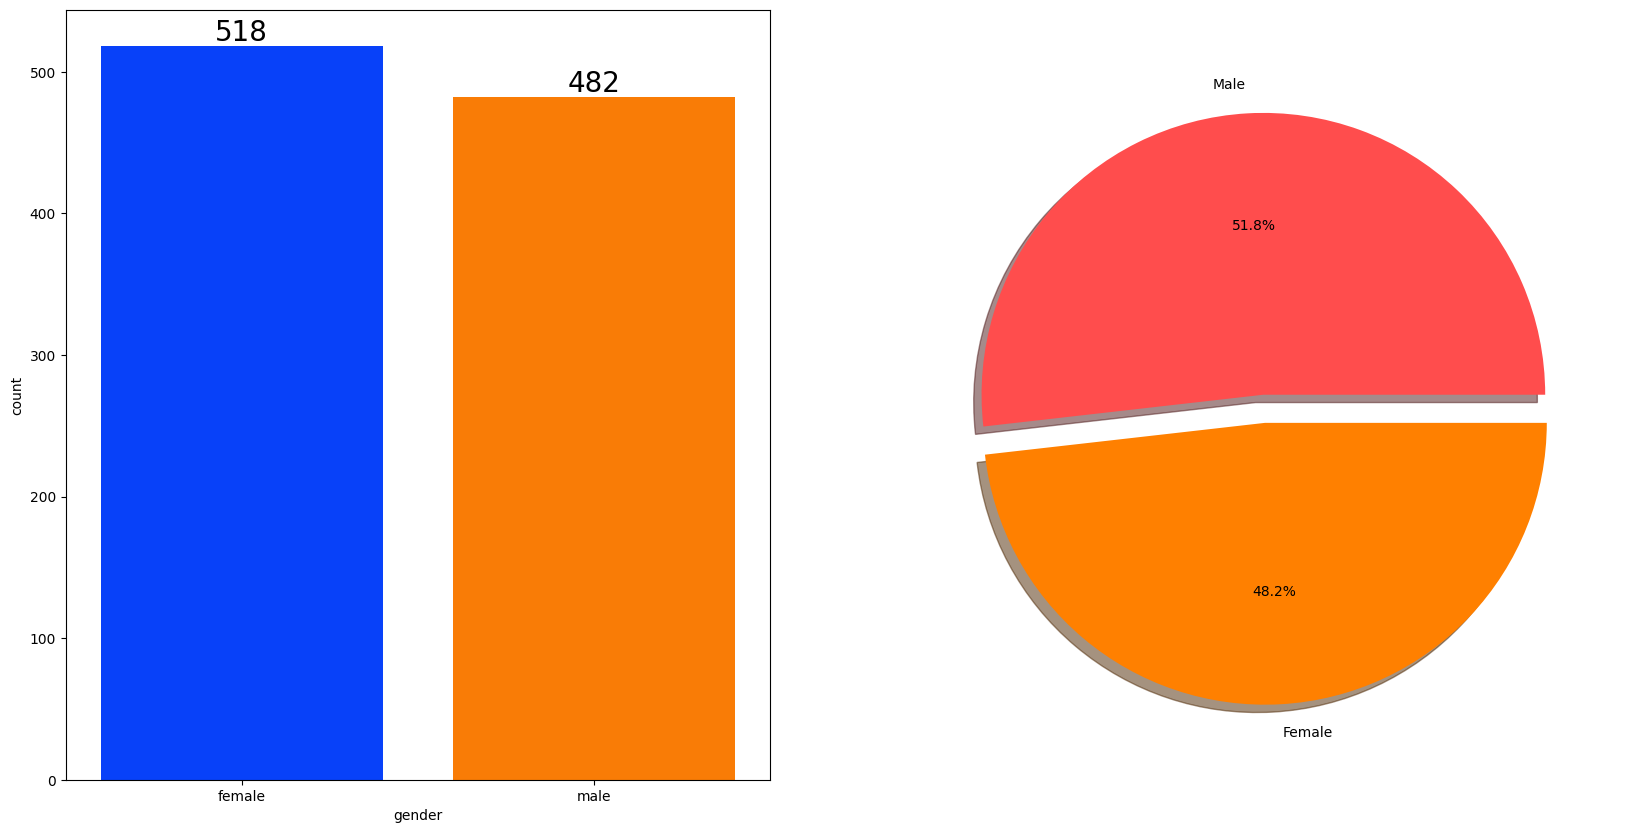

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights

- Gender has **balanced data**:
  - Female students: **518 (48%)**
  - Male students: **482 (52%)**

In [60]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [72]:
df['gender'] = df['gender'].replace({0: 'female', 1: 'male'}).astype(str)


In [73]:
df['gender'].dtype

dtype('O')

In [70]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

In [71]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,0,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,0,group C,some college,standard,completed,69,90,88,247,82.333333
2,0,group B,master's degree,standard,none,90,95,93,278,92.666667
3,1,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,1,group C,some college,standard,none,76,78,75,229,76.333333


In [74]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


#### Bivariate Analysis (Does gender have any impact on student's performance?)

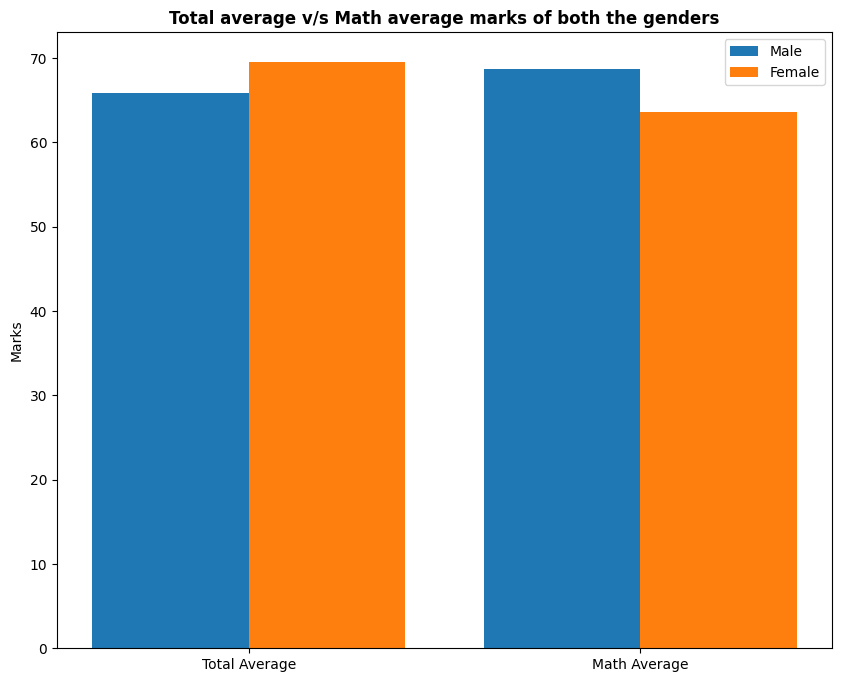

In [76]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights

- On average, **females have a better overall score** than males.
- Whereas, **males have scored higher in Maths**.

## 4.4.2 Race/Ethnicity Column

1. **How is the group-wise distribution?**
2. **Does Race/Ethnicity have any impact on student's performance?**

#### Univariate Analysis (How is the group-wise distribution?)

In [77]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


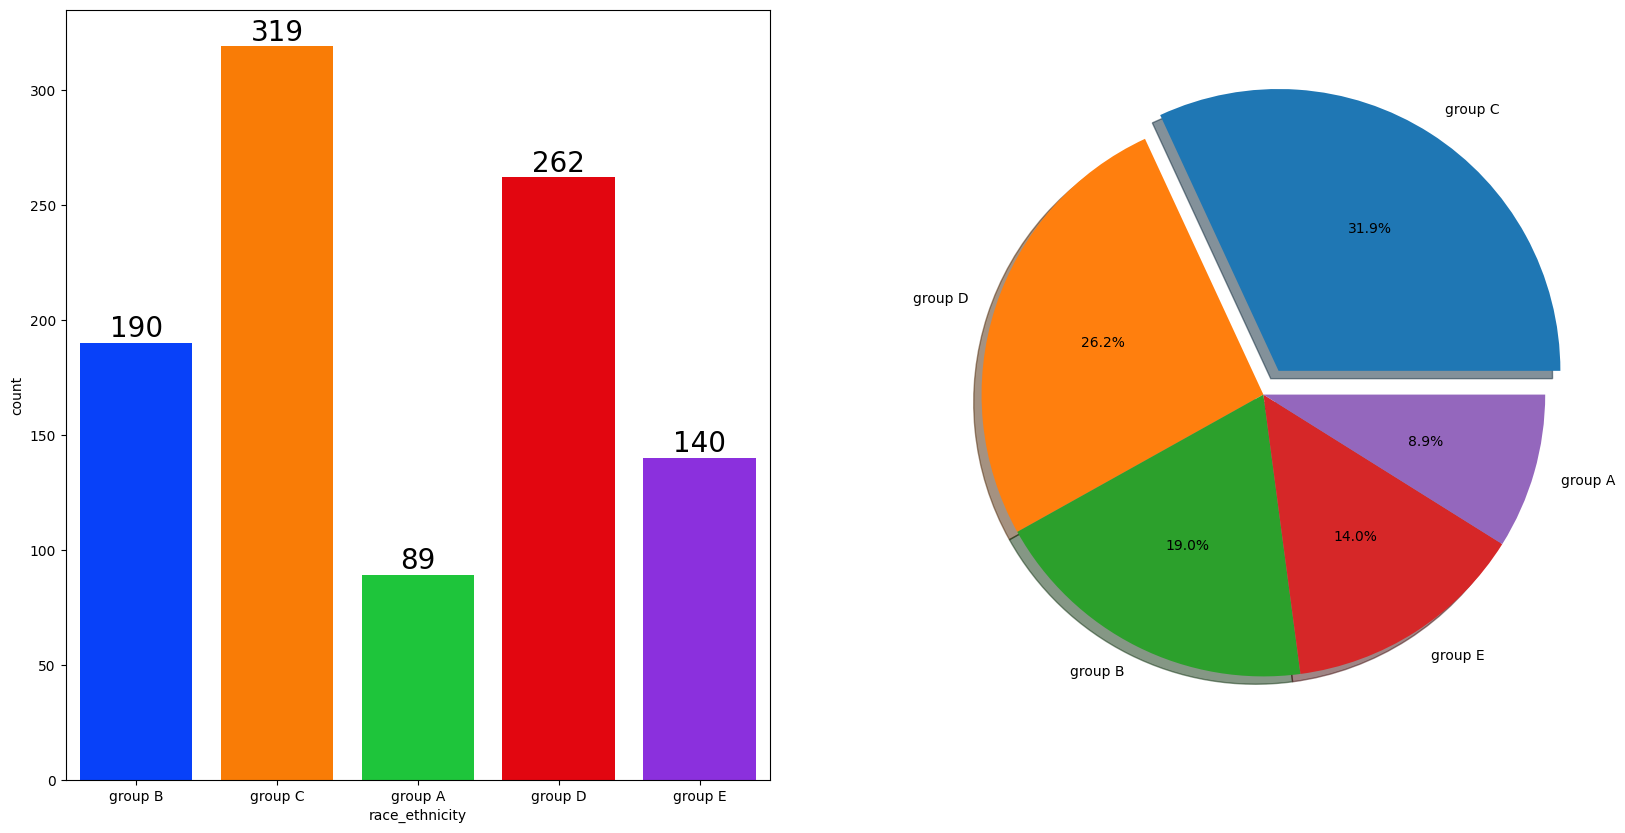

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Insights

- Most of the students belong to **Group C** or **Group D**.
- The lowest number of students belong to **Group A**.

#### Bivariate Analysis (Does Race/Ethnicity have any impact on student's performance?)

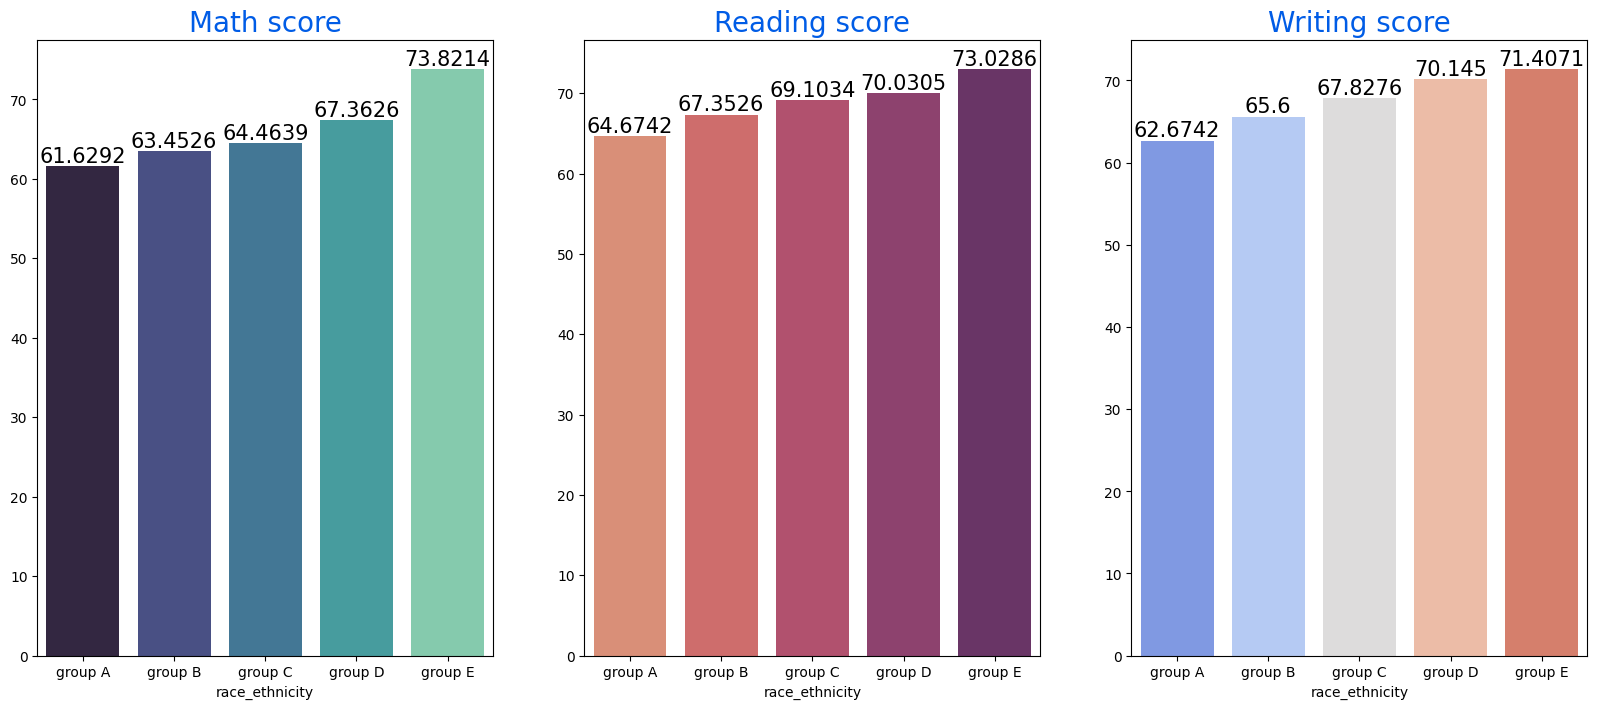

In [80]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights

- **Group E** students have scored the **highest marks**.
- **Group A** students have scored the **lowest marks**.
- Students from a **lower socioeconomic status** have a **lower average** in all course subjects.


## 4.4.3 Parental Level of Education Column

1. **What is the educational background of the student's parents?**
2. **Does parental education have any impact on student's performance?**

#### Univariate Analysis (What is the educational background of the student's parents?)

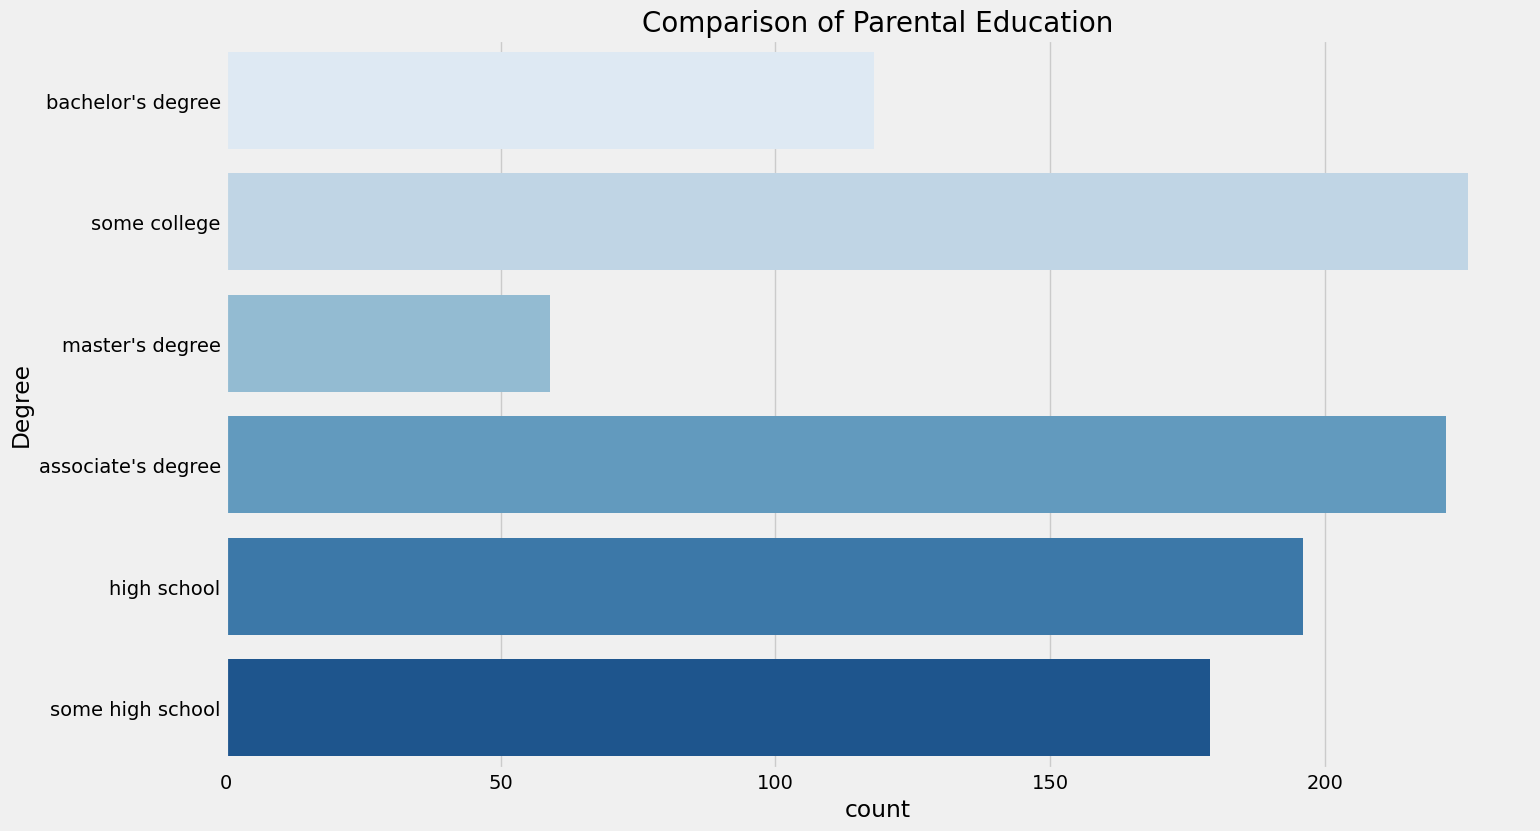

In [82]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('Degree')
plt.show()

### Insights

- The **largest number of parents** are from **some college**.


#### Bivariate Analysis (Does parental education have any impact on student's performance?)

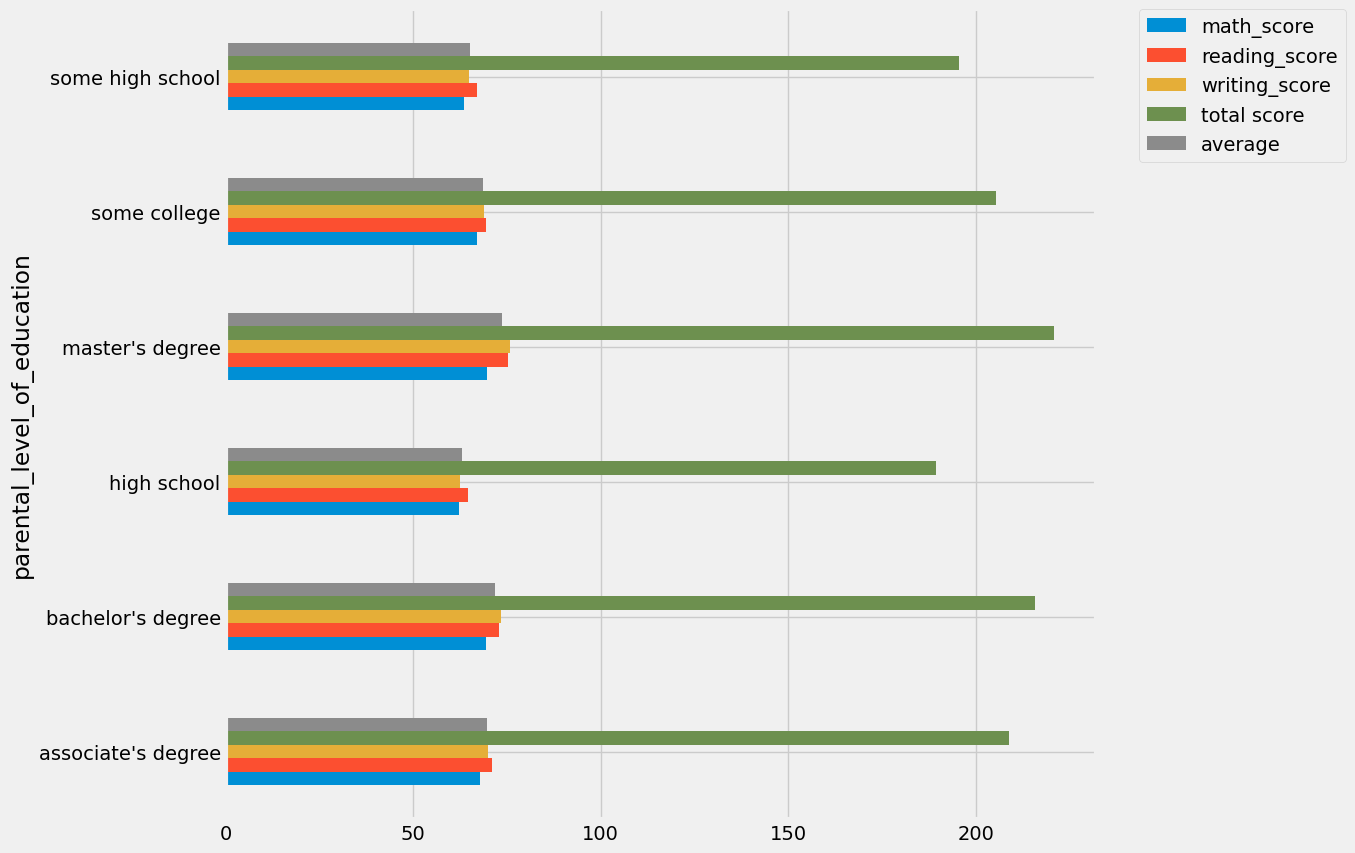

In [87]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
df.groupby('parental_level_of_education')[df_numeric.columns].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Insights
- The score of students whose parents possess master's and bachelor's level education are higher than others.

### 4.4.4 Lunch Column
- **Question 1:** Which type of lunch is most common among students?
- **Question 2:** What is the effect of lunch type on test results?

#### Univariate Analysis
- **Which type of lunch is most common among students?**

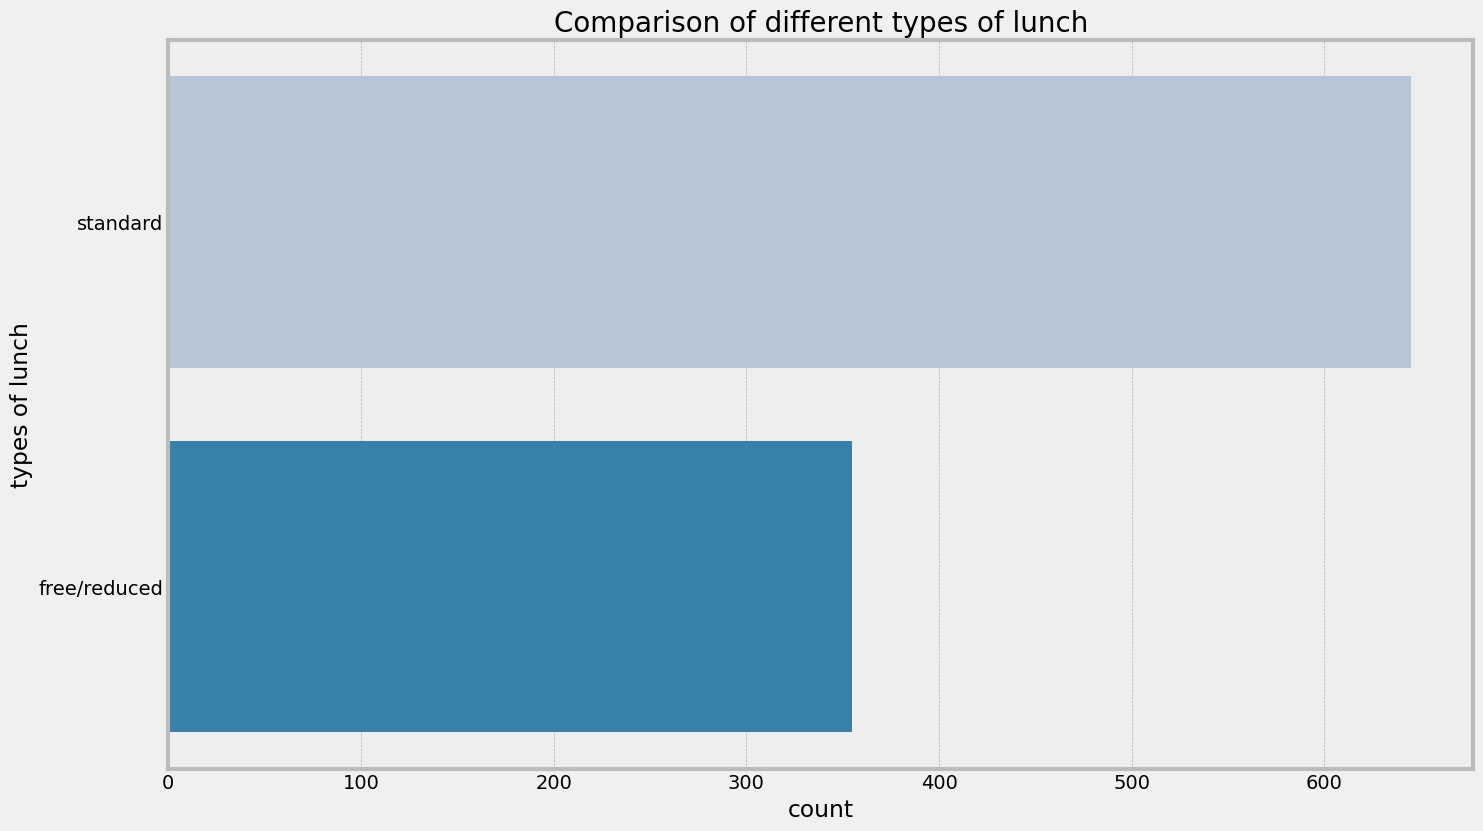

In [91]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('bmh')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('types of lunch')
plt.show()

## Insights  
- Students being served **Standard lunch** were more than those receiving **Free lunch**.  

## Bivariate Analysis  
### Is lunch type intake impacting student performance?  
- Investigating whether the type of lunch a student receives affects their academic performance.  


In [92]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


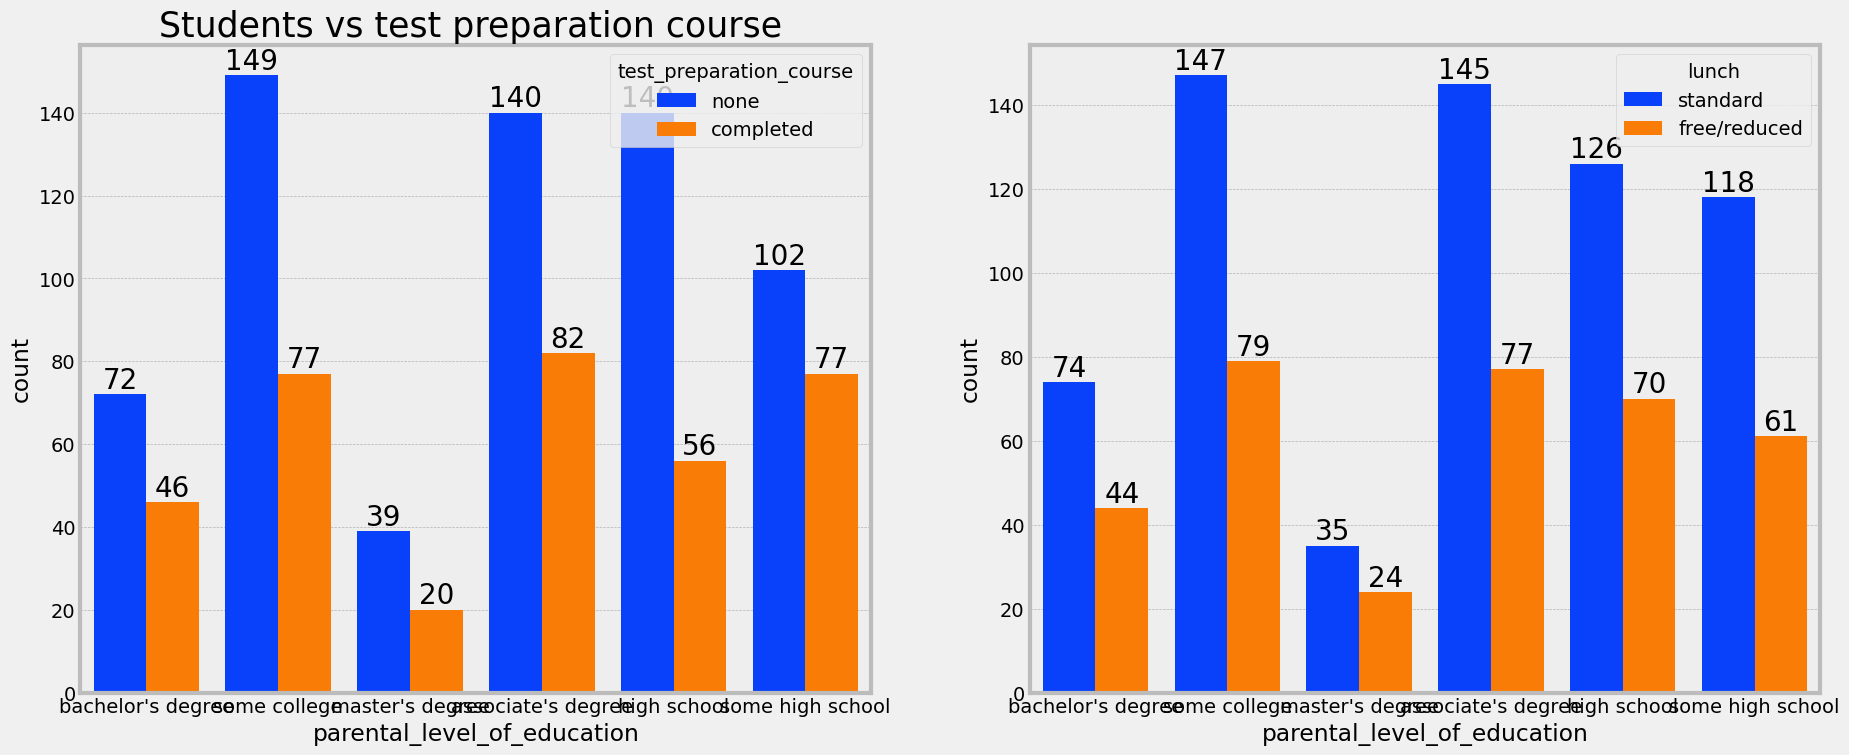

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

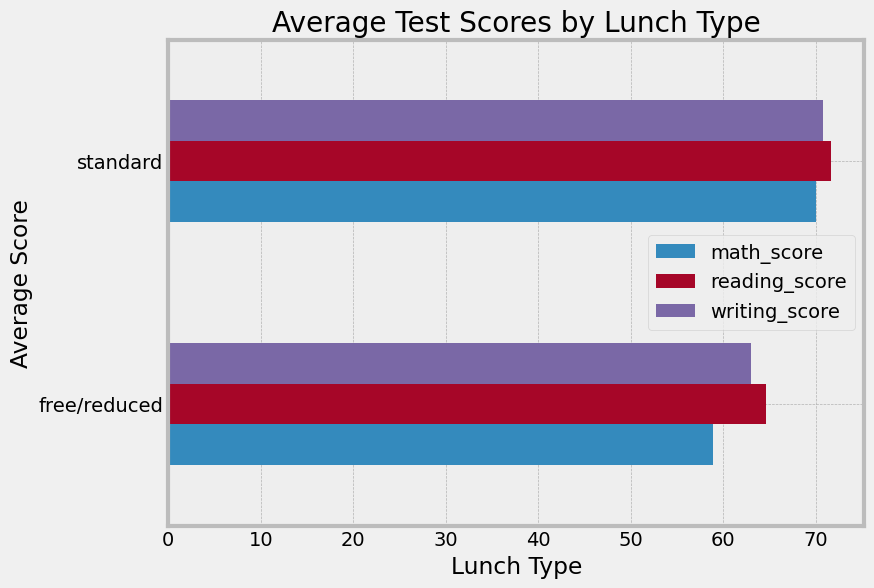

In [96]:
df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean().plot(kind='barh', figsize=(8, 6))
plt.title('Average Test Scores by Lunch Type')
plt.ylabel('Average Score')
plt.xlabel('Lunch Type')
plt.show()


## Insights  
- Students who get **Standard Lunch** tend to perform better than students who got **Free/Reduced Lunch**.  

### 4.4.5 Test Preparation Course Column  
- **Which type of lunch is most common among students?**  
- **Does the Test Preparation Course have any impact on student performance?**  

## Bivariate Analysis  
**Is the Test Preparation Course having any impact on student performance?**  


In [98]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


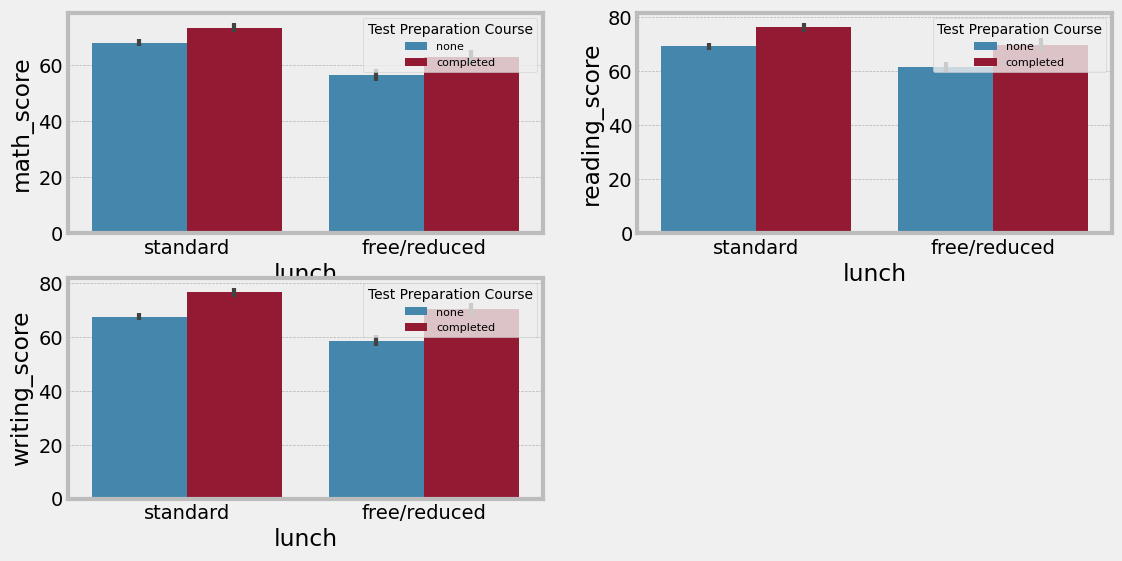

In [101]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.legend(title="Test Preparation Course", fontsize=8, title_fontsize=10, loc="upper right")

plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.legend(title="Test Preparation Course", fontsize=8, title_fontsize=10, loc="upper right")

plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.legend(title="Test Preparation Course", fontsize=8, title_fontsize=10, loc="upper right")


## Insights  
- Students who have **completed the Test Preparation Course** have **higher scores** in all three categories than those who haven't taken the course.  

### 4.4.6 Checking Outliers  


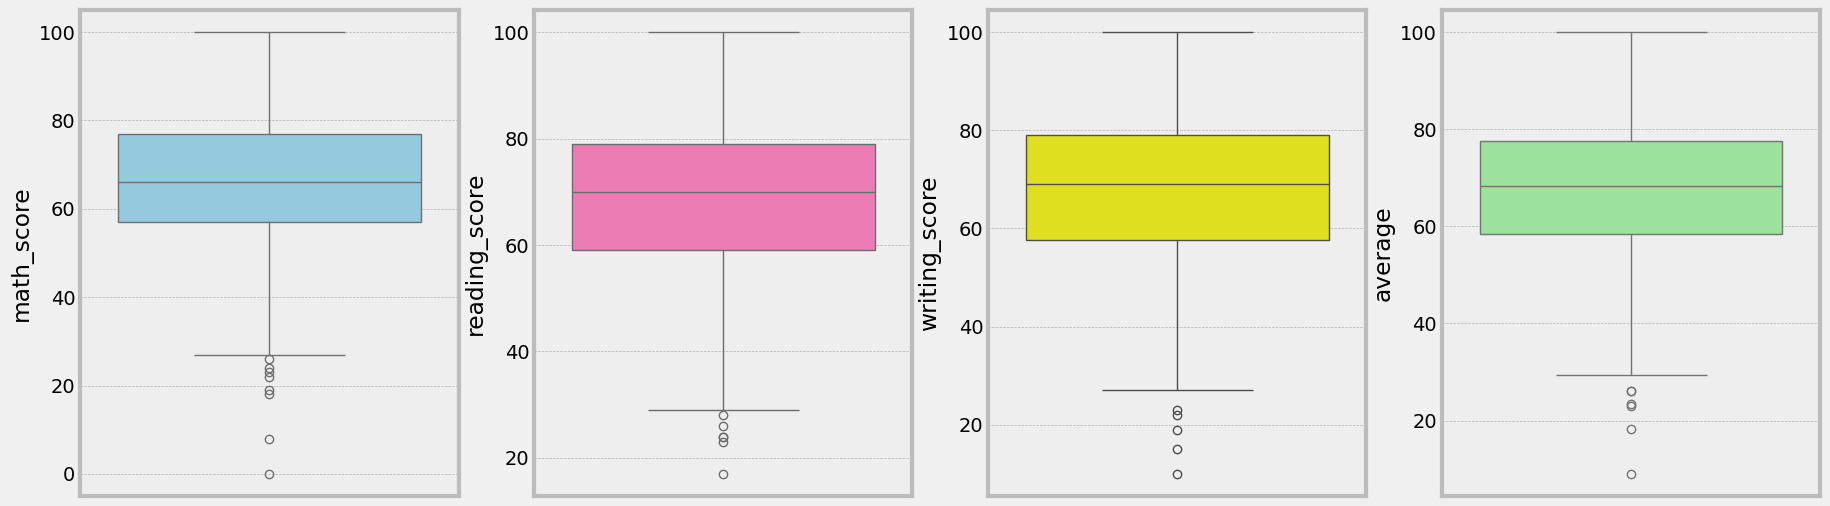

In [ ]:
plt.subplots(1,4,figsize=(20,6))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT


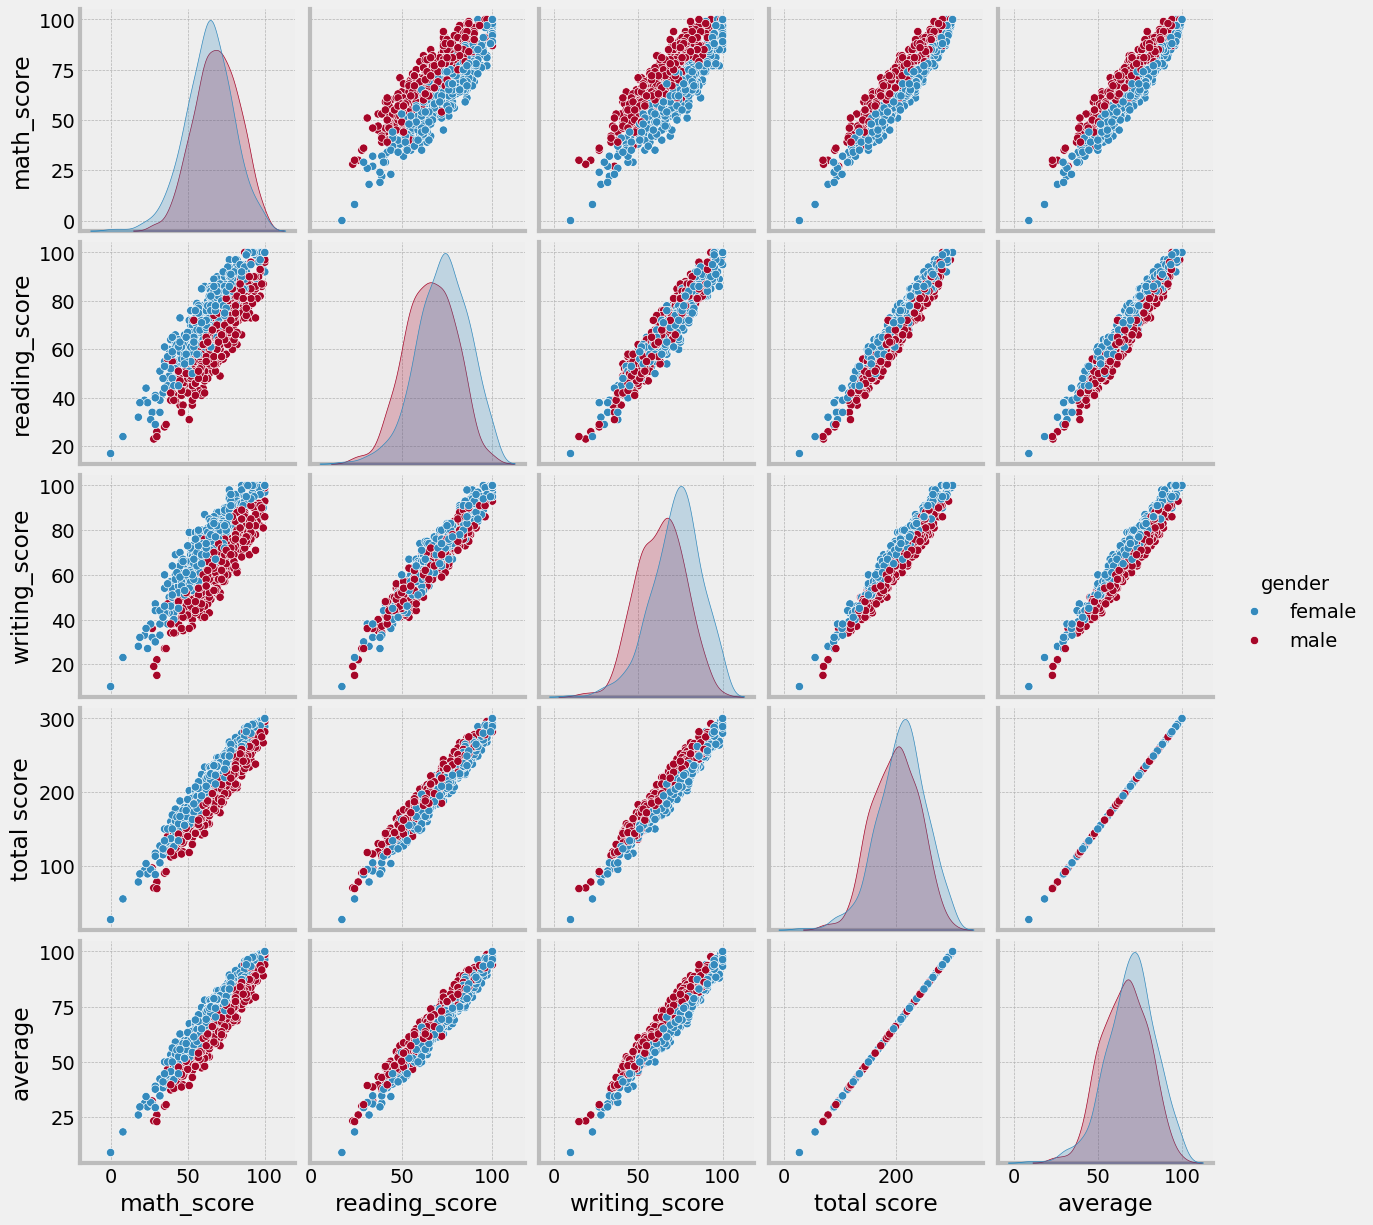

In [104]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights  
From the above plot, it is clear that all the scores increase linearly with each other.  

## 5. Conclusions  
- Student's performance is related to lunch type, race/ethnicity, and parental level of education.  
- Females lead in pass percentage and are also top scorers.  
- Student's performance is not strongly related to the test preparation course.  
- Completing the test preparation course is beneficial.  
